# Daily Return - the PErcent Returned from one day to the next
# Cumulative Return -> the amout after an entire time period
# Avg Daily Return -> Mean of the Daily Return 
# Std of daily Returns-> Standard deviation of Daily Return (Volitility)



#### Shard ratio -> Quantifies the relationship mathmetically between the mean daily return and the volitility of a Portfolio. It the measure of Risk Adjusted Return



### S = (Rp - Rf)/standard deviation

###### Rf -> is Risk Free, nnormally 0 but can be a representation of the treasury bomnd

## W will analyze the following stocks

In [2]:
import pandas as pd
from pandas_datareader import data as web
import numpy as np

In [14]:
import matplotlib.pyplot as plt
from plotly.offline import init_notebook_mode, download_plotlyjs, iplot, plot
import cufflinks as cf
import seaborn as sns

In [13]:
cf.go_offline()
init_notebook_mode(connected=True)

In [3]:
tickers = ["AAPL", "AMZN", "CSCO", "IBM"]
stocks_dataFrame = pd.DataFrame()
for t in tickers:
    stocks_dataFrame[t] = web.DataReader(t, data_source="yahoo", start = "2012-1-1", end="2017-1-1")["Adj Close"]
    

#### Check the head of the data

In [4]:
stocks_dataFrame.head()

,AAPL,AMZN,CSCO,IBM
Date,,,,
2012-01-03,50.994907,179.029999,14.633397,139.934006
2012-01-04,51.268970,177.509995,14.916168,139.363144
2012-01-05,51.838169,177.610001,14.861184,138.702209
2012-01-06,52.380054,182.610001,14.806202,137.109772
2012-01-09,52.296970,178.559998,14.900459,136.396225


In [5]:
stocks_dataFrame.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2012-01-03 to 2016-12-30
Data columns (total 4 columns):
AAPL    1258 non-null float64
AMZN    1258 non-null float64
CSCO    1258 non-null float64
IBM     1258 non-null float64
dtypes: float64(4)
memory usage: 49.1 KB


In [7]:
stocks_dataFrame.describe()

,AAPL,AMZN,CSCO,IBM
count,1258.000000,1258.000000,1258.000000,1258.000000
mean,85.050308,406.004301,20.662194,139.418370
std,20.231332,182.712716,4.241131,13.239639
min,49.142811,175.929993,11.977194,98.800140
25%,67.727772,266.627495,16.996219,130.000126
50%,86.052933,333.059998,20.736493,142.454964
75%,103.164562,534.012482,24.273900,148.983452
max,122.480698,844.359985,28.676102,165.514679


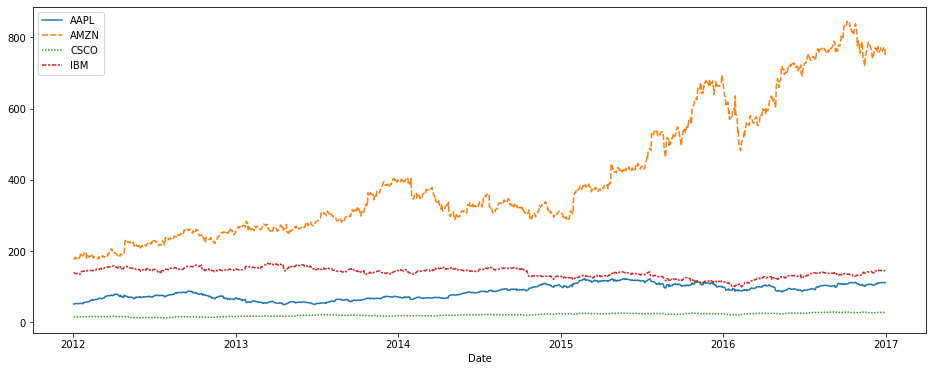

In [45]:
plt.figure(figsize=(16,6))
sns.lineplot(data=stocks_dataFrame[["AAPL","AMZN","CSCO","IBM"]])

### Let get the daily return for each stock

In [8]:
for stock in stocks_dataFrame:
    stocks_dataFrame[f"{stock} cum return"] = stocks_dataFrame[stock]/stocks_dataFrame[stock].iloc[0]

In [9]:
stocks_dataFrame

,AAPL,AMZN,CSCO,IBM,AAPL cum return,AMZN cum return,CSCO cum return,IBM cum return
Date,,,,,,,,
2012-01-03,50.994907,179.029999,14.633397,139.934006,1.000000,1.000000,1.000000,1.000000
2012-01-04,51.268970,177.509995,14.916168,139.363144,1.005374,0.991510,1.019324,0.995920
2012-01-05,51.838169,177.610001,14.861184,138.702209,1.016536,0.992068,1.015566,0.991197
2012-01-06,52.380054,182.610001,14.806202,137.109772,1.027162,1.019997,1.011809,0.979817
2012-01-09,52.296970,178.559998,14.900459,136.396225,1.025533,0.997375,1.018250,0.974718
...,...,...,...,...,...,...,...,...
2016-12-23,111.043777,760.590027,27.617710,144.999130,2.177546,4.248394,1.887307,1.036197
2016-12-27,111.749001,771.400024,27.753399,145.373108,2.191376,4.308775,1.896579,1.038869
2016-12-28,111.272507,772.130005,27.518202,144.546829,2.182032,4.312853,1.880507,1.032964


## WE will extract the stocks cum return to its own variable

In [10]:
stocks_cumulative_returns = stocks_dataFrame[["AAPL cum return","AMZN cum return", "CSCO cum return","IBM cum return"]]

In [11]:
stocks_cumulative_returns.head()

,AAPL cum return,AMZN cum return,CSCO cum return,IBM cum return
Date,,,,
2012-01-03,1.000000,1.000000,1.000000,1.000000
2012-01-04,1.005374,0.991510,1.019324,0.995920
2012-01-05,1.016536,0.992068,1.015566,0.991197
2012-01-06,1.027162,1.019997,1.011809,0.979817
2012-01-09,1.025533,0.997375,1.018250,0.974718


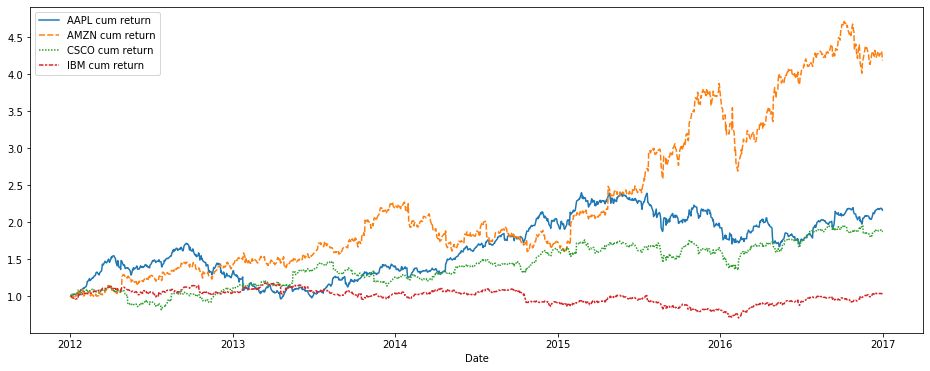

In [20]:
plt.figure(figsize=(16,6))
sns.lineplot(data=stocks_cumulative_returns)

## From oberving the the Cumulative daily returns for each stock we cna see that after 2016 Amazon would have provided you up to 4.5x  your investment if you invested in 2012. This would have been a great investment but we also need to consider the weight that Amazon would have held in a portfolio if it contained these 4 companies. Since we are just testing this at the moment below we will take into account abritrary weights or each company. Then we will use the Efficient Frontier to get the "best" weights for each company.  

In [21]:
weights = [0.3,0.2,0.4,0.1]
for stock, weight in zip(stocks_dataFrame, weights):
    stocks_dataFrame[f"{stock} Allocation"] = stocks_dataFrame[f"{stock} cum return"] * weight
    

In [27]:
stock_Allocaitons = stocks_dataFrame[["AAPL Allocation","AMZN Allocation","CSCO Allocation","IBM Allocation"]]
stock_Allocaitons.head()

,AAPL Allocation,AMZN Allocation,CSCO Allocation,IBM Allocation
Date,,,,
2012-01-03,0.300000,0.200000,0.400000,0.100000
2012-01-04,0.301612,0.198302,0.407729,0.099592
2012-01-05,0.304961,0.198414,0.406226,0.099120
2012-01-06,0.308149,0.203999,0.404724,0.097982
2012-01-09,0.307660,0.199475,0.407300,0.097472


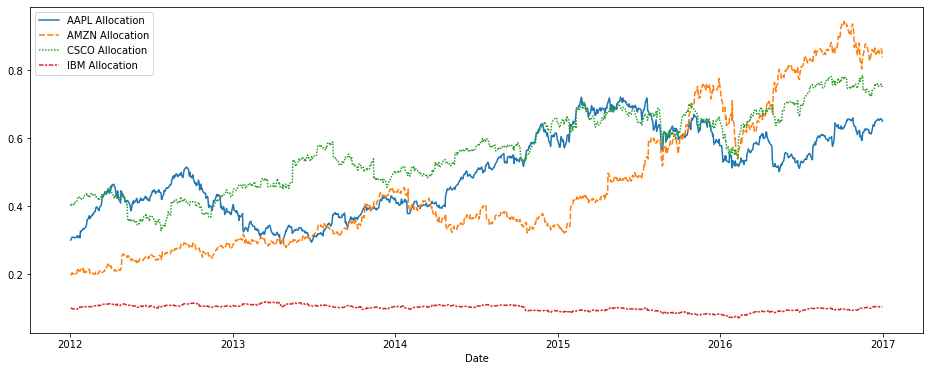

In [30]:
plt.figure(figsize=(16,6))
sns.lineplot(data=stock_Allocaitons)

### As a portfolio holder containing these 4 companies from 2012 to 2017 the weights of your portfoio would have weighed in at 80% Amazon at the end of 2017. We can see growth in CISCO, AMAZON, APPLE at the arbritrary weights provided. IBM on the other hand fell short over the period and we did not seem much shift in the Weights over the period

In [31]:
stock_Allocaitons.tail()

,AAPL Allocation,AMZN Allocation,CSCO Allocation,IBM Allocation
Date,,,,
2016-12-23,0.653264,0.849679,0.754923,0.103620
2016-12-27,0.657413,0.861755,0.758632,0.103887
2016-12-28,0.654610,0.862571,0.752203,0.103296
2016-12-29,0.654441,0.854773,0.753192,0.103551
2016-12-30,0.649339,0.837703,0.747257,0.103172


### Let see exactly how much we would have made over the period on a daily basis for the entire portfolio if we were to invest 100,000 in 2012. 

In [52]:
stocks_dataFrame

,AAPL,AMZN,CSCO,IBM,AAPL cum return,AMZN cum return,CSCO cum return,IBM cum return,AAPL Allocation,AMZN Allocation,CSCO Allocation,IBM Allocation,AAPL Position Value,AMZN Position Value,CSCO Position Value,IBM Position Value,Total Pos
Date,,,,,,,,,,,,,,,,,
2012-01-03,50.994907,179.029999,14.633397,139.934006,1.000000,1.000000,1.000000,1.000000,0.300000,0.200000,0.400000,0.100000,30000.000000,20000.000000,40000.000000,10000.000000,3.845923e+07
2012-01-04,51.268970,177.509995,14.916168,139.363144,1.005374,0.991510,1.019324,0.995920,0.301612,0.198302,0.407729,0.099592,30161.229694,19830.195578,40772.947275,9959.204926,3.830583e+07
2012-01-05,51.838169,177.610001,14.861184,138.702209,1.016536,0.992068,1.015566,0.991197,0.304961,0.198414,0.406226,0.099120,30496.085842,19841.367572,40622.649727,9911.973058,3.830116e+07
2012-01-06,52.380054,182.610001,14.806202,137.109772,1.027162,1.019997,1.011809,0.979817,0.308149,0.203999,0.404724,0.097982,30814.873778,20399.933179,40472.357392,9798.173861,3.869060e+07
2012-01-09,52.296970,178.559998,14.900459,136.396225,1.025533,0.997375,1.018250,0.974718,0.307660,0.199475,0.407300,0.097472,30765.995894,19947.494697,40730.007353,9747.182199,3.821537e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-23,111.043777,760.590027,27.617710,144.999130,2.177546,4.248394,1.887307,1.036197,0.653264,0.849679,0.754923,0.103620,65326.392285,84967.886057,75492.272697,10361.965234,1.044251e+08
2016-12-27,111.749001,771.400024,27.753399,145.373108,2.191376,4.308775,1.896579,1.038869,0.657413,0.861755,0.758632,0.103887,65741.270821,86175.504628,75863.174357,10388.690522,1.056276e+08
2016-12-28,111.272507,772.130005,27.518202,144.546829,2.182032,4.312853,1.880507,1.032964,0.654610,0.862571,0.752203,0.103296,65460.952338,86257.053024,75220.269458,10329.642781,1.055468e+08


In [53]:
Position_Values = stocks_dataFrame[["AAPL Position Value","AMZN Position Value","CSCO Position Value","IBM Position Value"]]

In [54]:
Position_Values.head()

,AAPL Position Value,AMZN Position Value,CSCO Position Value,IBM Position Value
Date,,,,
2012-01-03,30000.000000,20000.000000,40000.000000,10000.000000
2012-01-04,30161.229694,19830.195578,40772.947275,9959.204926
2012-01-05,30496.085842,19841.367572,40622.649727,9911.973058
2012-01-06,30814.873778,20399.933179,40472.357392,9798.173861
2012-01-09,30765.995894,19947.494697,40730.007353,9747.182199


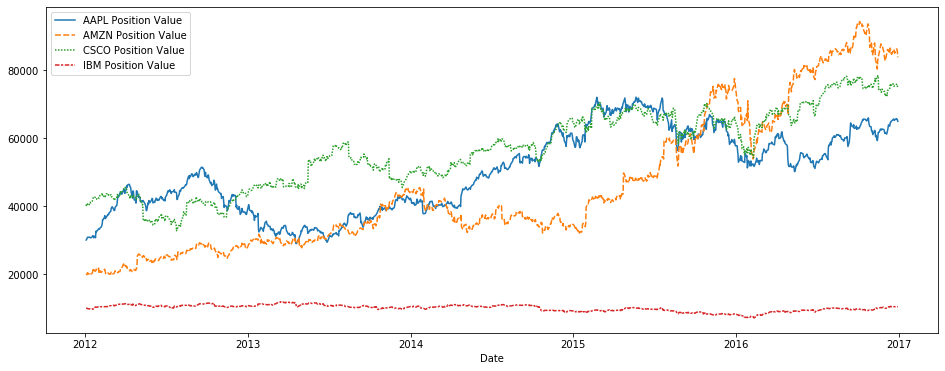

In [55]:
plt.figure(figsize=(16,6))
sns.lineplot(data=Position_Values)

### Not surprising that we can believe that Amazon would have provided the highest return on your original investment since 2012. We can see that your return up to 80,000 alone from our original investment. WE sould also take a closer look at the Total Positon Values in the Portfolio. We will code this out below.

In [56]:
Position_Values

,AAPL Position Value,AMZN Position Value,CSCO Position Value,IBM Position Value
Date,,,,
2012-01-03,30000.000000,20000.000000,40000.000000,10000.000000
2012-01-04,30161.229694,19830.195578,40772.947275,9959.204926
2012-01-05,30496.085842,19841.367572,40622.649727,9911.973058
2012-01-06,30814.873778,20399.933179,40472.357392,9798.173861
2012-01-09,30765.995894,19947.494697,40730.007353,9747.182199
...,...,...,...,...
2016-12-23,65326.392285,84967.886057,75492.272697,10361.965234
2016-12-27,65741.270821,86175.504628,75863.174357,10388.690522
2016-12-28,65460.952338,86257.053024,75220.269458,10329.642781


In [57]:
stocks_dataFrame["Total Pos"] = Position_Values.sum(axis=1) 

In [59]:
stocks_dataFrame.head()

,AAPL,AMZN,CSCO,IBM,AAPL cum return,AMZN cum return,CSCO cum return,IBM cum return,AAPL Allocation,AMZN Allocation,CSCO Allocation,IBM Allocation,AAPL Position Value,AMZN Position Value,CSCO Position Value,IBM Position Value,Total Pos
Date,,,,,,,,,,,,,,,,,
2012-01-03,50.994907,179.029999,14.633397,139.934006,1.000000,1.000000,1.000000,1.000000,0.300000,0.200000,0.400000,0.100000,30000.000000,20000.000000,40000.000000,10000.000000,100000.000000
2012-01-04,51.268970,177.509995,14.916168,139.363144,1.005374,0.991510,1.019324,0.995920,0.301612,0.198302,0.407729,0.099592,30161.229694,19830.195578,40772.947275,9959.204926,100723.577473
2012-01-05,51.838169,177.610001,14.861184,138.702209,1.016536,0.992068,1.015566,0.991197,0.304961,0.198414,0.406226,0.099120,30496.085842,19841.367572,40622.649727,9911.973058,100872.076199
2012-01-06,52.380054,182.610001,14.806202,137.109772,1.027162,1.019997,1.011809,0.979817,0.308149,0.203999,0.404724,0.097982,30814.873778,20399.933179,40472.357392,9798.173861,101485.338211
2012-01-09,52.296970,178.559998,14.900459,136.396225,1.025533,0.997375,1.018250,0.974718,0.307660,0.199475,0.407300,0.097472,30765.995894,19947.494697,40730.007353,9747.182199,101190.680142


In [61]:
stocks_dataFrame["Total Pos"].iplot()

#### We could rate this portfolio as Strong since we can see that with a 100,000 investment in 2012 we would have doubled our money+, with as much as earning 250,000. We will calculate the Daily Returns for the portfolio to begin to calulate the Sharp Ratio of the portfolio

In [62]:
stocks_dataFrame["Daily Return"] = stocks_dataFrame["Total Pos"].pct_change()

In [66]:
stocks_dataFrame["Daily Return"].iplot(kind = "hist", color = "red")

### WE will calculate the sverage daily return for the Portfolio: 

In [67]:
avg_Daily_Return = stocks_dataFrame["Daily Return"].mean()
avg_Daily_Return

0.0007414234622405453

In [69]:
std_port = stocks_dataFrame["Daily Return"].std()
std_port

0.011473162606248838

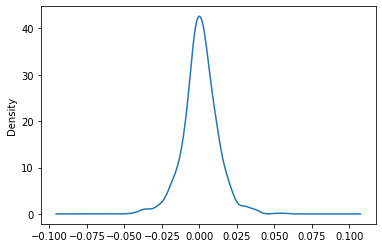

In [72]:
stocks_dataFrame["Daily Return"].plot(kind = "kde")

In [77]:
cumulative_DailyReturn = 100* (stocks_dataFrame["Total Pos"][-1]/stocks_dataFrame["Total Pos"][0] -1)

In [78]:
cumulative_DailyReturn

133.74718756303938

### Looks like you would have gotten 133.75% earnings fro mthis portfolio for the given period. If we started with 100,000 we can check the last value at the Total Pos to see if our calculation is correct. 

In [79]:
stocks_dataFrame["Total Pos"][-1]

233747.1875630394